# Which Classifier Should I Choose? 

This is one of the most import questions to ask when approaching a machine learning problem. I find it easier to just test them all at once. Here's 10 of your favorite Scikit-Learn algorithms applied to the leaf data. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\shape\train.csv")
test = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\shape\test.csv")


In [2]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Data Preparation


In [3]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    #train = train.drop(['species', 'id'], axis=1)
    train = train.iloc[:,66:130]
    #test = test.drop(['id'], axis=1)
    test = test.iloc[:,65:129]
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,...,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64
0,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,...,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.00061,0.000661


In [4]:
test.head()

,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,...,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64
0,0.000782,0.000828,0.000876,0.000927,0.000993,0.001060,0.001123,0.001205,0.001295,0.001393,...,0.000879,0.000819,0.000762,0.000717,0.000698,0.000688,0.000680,0.000695,0.000719,0.000737
1,0.000534,0.000503,0.000450,0.000499,0.000457,0.000414,0.000384,0.000359,0.000370,0.000413,...,0.000341,0.000269,0.000193,0.000140,0.000173,0.000221,0.000281,0.000350,0.000421,0.000488
2,0.000712,0.000682,0.000661,0.000648,0.000729,0.000743,0.000734,0.000743,0.000738,0.000753,...,0.000451,0.000407,0.000497,0.000582,0.000680,0.000755,0.000762,0.000761,0.000745,0.000715
3,0.000556,0.000601,0.000621,0.000554,0.000526,0.000516,0.000456,0.000378,0.000320,0.000343,...,0.000514,0.000501,0.000450,0.000400,0.000368,0.000367,0.000388,0.000461,0.000519,0.000531
4,0.000763,0.000830,0.000775,0.000703,0.000633,0.000612,0.000610,0.000610,0.000612,0.000613,...,0.000622,0.000602,0.000606,0.000626,0.000627,0.000634,0.000635,0.000638,0.000626,0.000690


## Stratified Train/Test Split

Stratification is necessary for this dataset because there is a relatively large number of classes (100 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices. 

In [5]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn Classifier Showdown

Simply looping through 10 out-of-the box classifiers and printing the results. Obviously, these will perform much better after tuning their hyperparameters, but this gives you a decent ballpark idea. 

In [6]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LinearDiscriminantAnalysis(),
    NuSVC(probability=True),
    SVC(kernel="rbf", C=0.025, probability=True),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    # QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log  Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


LinearDiscriminantAnalysis
****Results****
Accuracy: 48.4848%
Log  Loss: 4.0516249889646305
NuSVC
****Results****
Accuracy: 62.6263%
Log  Loss: 2.547186955938279
SVC
****Results****
Accuracy: 41.4141%
Log  Loss: 4.645529056952269
KNeighborsClassifier
****Results****
Accuracy: 53.0303%
Log  Loss: 10.139574265079506
DecisionTreeClassifier
****Results****
Accuracy: 36.8687%
Log  Loss: 21.804783077595225
GradientBoostingClassifier
****Results****
Accuracy: 32.8283%
Log  Loss: 5.409370402578252
GaussianNB
****Results****
Accuracy: 48.4848%
Log  Loss: 12.61633463759098


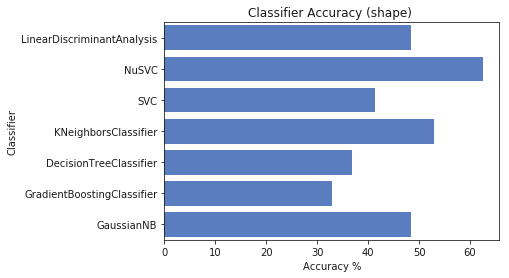

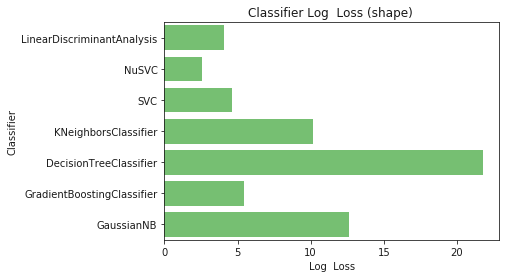

In [7]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy (shape) ')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log  Loss')
plt.title('Classifier Log  Loss (shape) ')
plt.show()

**##Random search for optimal hyperparameters of the SVM classifier**

In [8]:
import scipy
from sklearn.grid_search import RandomizedSearchCV
clf = SVC(probability=True, random_state=1)
param_grid = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}
rand_search = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = 20) 
rand_search.fit(X_train,y_train) 
rand_search.best_params_

{'C': 234.35373567174315,
 'class_weight': 'balanced',
 'gamma': 0.005077614497150745,
 'kernel': 'rbf'}

In [9]:
predr = rand_search.predict(X_test)
print("Accuracy: {:.4%}".format(accuracy_score(y_test,predr)))

Accuracy: 67.6768%


Hyperparameter tuning gives us an accuracy boost of over 1%!!!

## Submission

After choosing your favorite classifier, format the output for a leaderboard submission. 

In [10]:
# Predict Test Set
favorite_clf = SVC(C=13.450385695977566, class_weight='balanced', gamma=0.0043155380191205834,
 kernel='rbf',probability = True, random_state=1)
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict_proba(test)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# Export Submission
#submission.to_csv('submission.csv', index = False)
submission.tail()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,0.027286,0.042562,0.004281,0.013494,0.004793,0.013166,0.002684,0.005459,0.087527,...,0.002759,0.006886,0.007354,0.003305,0.002419,0.010855,0.017380,0.006830,0.004286,0.008243
590,1577,0.027289,0.042521,0.004280,0.013493,0.004793,0.013159,0.002684,0.005460,0.087545,...,0.002759,0.006886,0.007357,0.003306,0.002419,0.010854,0.017376,0.006830,0.004284,0.008244
591,1579,0.027279,0.042560,0.004279,0.013484,0.004795,0.013169,0.002684,0.005460,0.087539,...,0.002758,0.006882,0.007354,0.003306,0.002420,0.010848,0.017366,0.006827,0.004286,0.008241
592,1580,0.027289,0.042493,0.004282,0.013505,0.004790,0.013150,0.002685,0.005460,0.087555,...,0.002760,0.006891,0.007358,0.003306,0.002419,0.010860,0.017386,0.006834,0.004284,0.008246
593,1583,0.027290,0.042517,0.004281,0.013495,0.004792,0.013158,0.002685,0.005460,0.087546,...,0.002759,0.006887,0.007357,0.003306,0.002419,0.010855,0.017377,0.006831,0.004284,0.008245
